# ipynb-файл:
- Создать несколько типичных запросов к БД, на которых можно было бы увидеть основные возможности выборки данных, желательно с использованием NumPy, Pandas, Matplotlib и т.п..
Например:
- статистика ссылок по доменам
- поиск дубликатов ссылок

In [36]:
# Создаем пример БД
import os
import sqlite3
from prettytable import from_db_cursor

TEMP_DIR = "temp"
if not os.path.exists(TEMP_DIR):
    os.mkdir(TEMP_DIR)

db_name = os.path.join(TEMP_DIR, 'temp_SQLite_test_2.db')

db = sqlite3.connect(db_name)
cur = db.cursor()

In [37]:
"""
# Пытаемся создать БД
try:
    cur.execute("CREATE TABLE data (id integer primary key AUTOINCREMENT NOT NULL, filename varchar(100), url_domain varchar(100))")
    db.commit()
except:
    pass

# Пытаемся заполнить таблицу БД
try:
    filenames = "test_file_1.txt, test_file_2.txt, test_file_3.txt, test_file_1.txt, test_file_1.txt".split(', ')
    cur.executemany("INSERT INTO data (filename) VALUES (?)", [(i,) for i in filenames])
    cur.execute('UPDATE data SET url_domain = "vk.com" WHERE id = 1')
    cur.execute('UPDATE data SET url_domain = "D:\\" WHERE id = 2')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 3')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 4')
    cur.execute('UPDATE data SET url_domain = "github.com" WHERE id = 5')
except Exception as ex:
    print(ex)

# Выводим данные БД
cur.execute("SELECT * FROM data")
from_db_cursor(cur)
"""

'\n# Пытаемся создать БД\ntry:\n    cur.execute("CREATE TABLE data (id integer primary key AUTOINCREMENT NOT NULL, filename varchar(100), url_domain varchar(100))")\n    db.commit()\nexcept:\n    pass\n\n# Пытаемся заполнить таблицу БД\ntry:\n    filenames = "test_file_1.txt, test_file_2.txt, test_file_3.txt, test_file_1.txt, test_file_1.txt".split(\', \')\n    cur.executemany("INSERT INTO data (filename) VALUES (?)", [(i,) for i in filenames])\n    cur.execute(\'UPDATE data SET url_domain = "vk.com" WHERE id = 1\')\n    cur.execute(\'UPDATE data SET url_domain = "D:\\" WHERE id = 2\')\n    cur.execute(\'UPDATE data SET url_domain = "github.com" WHERE id = 3\')\n    cur.execute(\'UPDATE data SET url_domain = "github.com" WHERE id = 4\')\n    cur.execute(\'UPDATE data SET url_domain = "github.com" WHERE id = 5\')\nexcept Exception as ex:\n    print(ex)\n\n# Выводим данные БД\ncur.execute("SELECT * FROM data")\nfrom_db_cursor(cur)\n'

In [38]:
# Статистика ссылок по доменам
import numpy
import pandas
import matplotlib

df = pandas.read_sql_query("SELECT * FROM table_urls_stats", db)
df.head(10)

,id,url_name,file_path,response_status,process_time,screenshot
0,1,vk.com/b0urh,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com/b0urh',0.000000,0
1,2,vk.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com',0.000000,0
2,3,vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com/b0urhood',0.000000,0
3,4,moex.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'moex.com',0.000000,0
4,5,moexfdvfgrvdfghdbdgfxhfbxfgndgzgs.ru,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'moexfdvfgrvdfghdbdgfxhfbxfg...,0.000000,0
5,6,https://v.com/burhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,<urlopen error [Errno 11001] getaddrinfo failed>,0.000000,0
6,7,https://bourhood-web-portfolio.vercel.app,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,68.173298,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
7,8,https://www.framer.com/motion,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,68.902873,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
8,9,https://sketchfab.com/3d-models/galax-tea-c3f5...,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.810782,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
9,10,https://sqlitebrowser.org/dl,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.771745,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21 non-null     int64  
 1   url_name         21 non-null     object 
 2   file_path        21 non-null     object 
 3   response_status  21 non-null     object 
 4   process_time     21 non-null     float64
 5   screenshot       21 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [40]:
copy_df = df.copy()
data_screenshots_bytes_list = copy_df.screenshot
data_screenshots_list = []
for screenshot_bytes in data_screenshots_bytes_list:
    screenshot = f'<img src="data:image/jpg;base64, {screenshot_bytes}">'
    data_screenshots_list.append(screenshot)
copy_df.screenshot = data_screenshots_list
print(copy_df.screenshot)

0                  <img src="data:image/jpg;base64, 0">
1                  <img src="data:image/jpg;base64, 0">
2                  <img src="data:image/jpg;base64, 0">
3                  <img src="data:image/jpg;base64, 0">
4                  <img src="data:image/jpg;base64, 0">
5                  <img src="data:image/jpg;base64, 0">
6     <img src="data:image/jpg;base64, b'\x89PNG\r\n...
7     <img src="data:image/jpg;base64, b'\x89PNG\r\n...
8     <img src="data:image/jpg;base64, b'\x89PNG\r\n...
9     <img src="data:image/jpg;base64, b'\x89PNG\r\n...
10    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
11    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
12    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
13    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
14    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
15    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
16    <img src="data:image/jpg;base64, b'\x89PNG\r\n...
17    <img src="data:image/jpg;base64, b'\x89PNG

In [41]:
print(df.count())

id                 21
url_name           21
file_path          21
response_status    21
process_time       21
screenshot         21
dtype: int64


In [42]:
df.url_name.value_counts()

https://vk.com/b0urhood                                                       5
https://github.com/BouRHooD                                                   2
vk.com/b0urh                                                                  1
vk.com                                                                        1
vk.com/b0urhood                                                               1
moex.com                                                                      1
moexfdvfgrvdfghdbdgfxhfbxfgndgzgs.ru                                          1
https://v.com/burhood                                                         1
https://bourhood-web-portfolio.vercel.app                                     1
https://www.framer.com/motion                                                 1
https://sketchfab.com/3d-models/galax-tea-c3f5fc0760144f6f85ed61e67195c683    1
https://sqlitebrowser.org/dl                                                  1
https://www.youtube.com                 

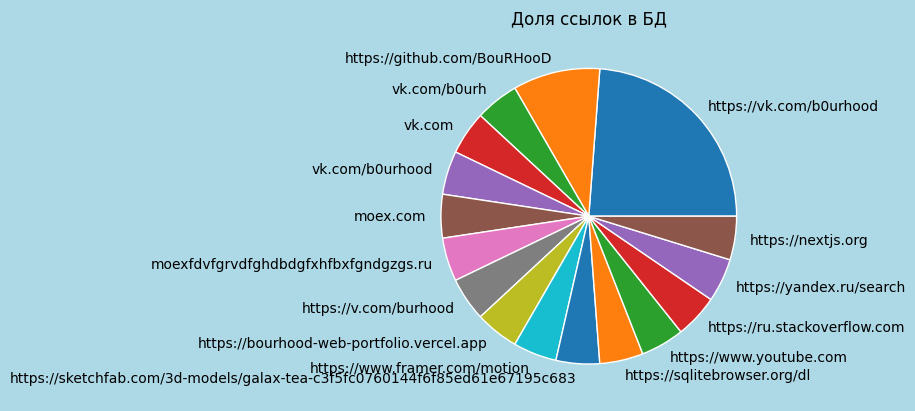

In [43]:
import matplotlib.pyplot as plt

dict_df = dict(df.url_name.value_counts())

labels = dict_df.keys()
values = dict_df.values()

fig, ax = plt.subplots()
fig.set_facecolor('lightblue')
ax.set_title('Доля ссылок в БД')
ax.pie(values, labels=labels, wedgeprops={"linewidth": 1, "edgecolor":'white'})
plt.show()

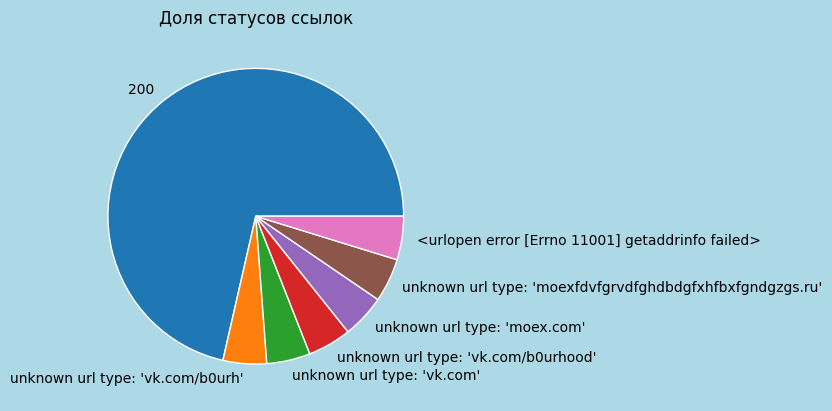

In [44]:
import matplotlib.pyplot as plt

dict_df = dict(df.response_status.value_counts())

labels = dict_df.keys()
values = dict_df.values()

fig, ax = plt.subplots()
fig.set_facecolor('lightblue')
ax.set_title('Доля статусов ссылок')
ax.pie(values, labels=labels, wedgeprops={"linewidth": 1, "edgecolor":'white'})
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.0, 68.17329835891724, 68.90287280082703, 77.810781955719, 77.77174472808838, 78.05832195281982, 77.96165871620178, 77.86862778663635, 77.84862804412842, 78.64738631248474, 79.08625173568726, 79.30230927467346, 79.40427231788635, 79.23821544647217, 83.22704577445984, 83.85140347480774]


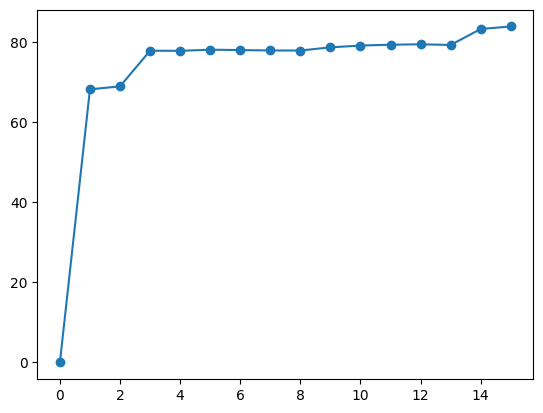

In [45]:
# Время выполнения обработки ссылки
list_df = df.process_time.value_counts()

_x = [i for i in range(len(list_df))]
_y = list(list_df.keys())
print(_x)
print(_y)

plt.plot(_x, _y)
plt.scatter(_x, _y)
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.0, 68.17329835891724, 68.90287280082703, 77.810781955719, 77.77174472808838, 78.05832195281982, 77.96165871620178, 77.86862778663635, 77.84862804412842, 78.64738631248474, 79.08625173568726, 79.30230927467346, 79.40427231788635, 79.23821544647217, 83.22704577445984, 83.85140347480774]


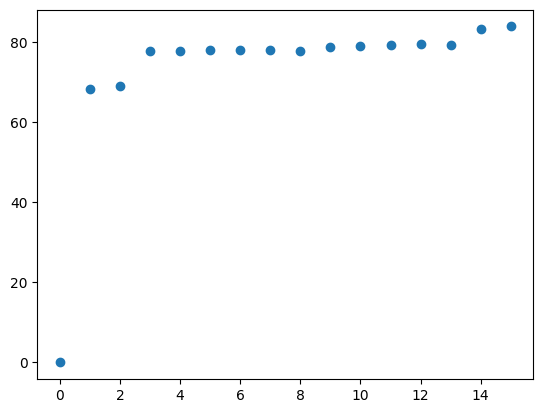

In [46]:
# Поиск дубликатов ссылок
df[df.url_name.duplicated()]


,id,url_name,file_path,response_status,process_time,screenshot
13,14,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.848628,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
14,15,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,78.647386,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
15,16,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,79.086252,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
18,19,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,79.238215,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
20,21,https://github.com/BouRHooD,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,83.851403,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [47]:
# Поиск дубликатов file_path
df[df.file_path.duplicated()]

,id,url_name,file_path,response_status,process_time,screenshot
1,2,vk.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com',0.000000,0
2,3,vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com/b0urhood',0.000000,0
5,6,https://v.com/burhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,<urlopen error [Errno 11001] getaddrinfo failed>,0.000000,0
7,8,https://www.framer.com/motion,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,68.902873,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
8,9,https://sketchfab.com/3d-models/galax-tea-c3f5...,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.810782,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
9,10,https://sqlitebrowser.org/dl,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.771745,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
11,12,https://ru.stackoverflow.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.961659,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
12,13,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.868628,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
13,14,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.848628,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
14,15,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,78.647386,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [52]:
# Поиск дубликатов screenshot
screenshot_dublicate = df[df.screenshot.duplicated(keep=False)]

,id,url_name,file_path,response_status,process_time,screenshot
0,1,vk.com/b0urh,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com/b0urh',0.000000,0
1,2,vk.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com',0.000000,0
2,3,vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'vk.com/b0urhood',0.000000,0
3,4,moex.com,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'moex.com',0.000000,0
4,5,moexfdvfgrvdfghdbdgfxhfbxfgndgzgs.ru,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,unknown url type: 'moexfdvfgrvdfghdbdgfxhfbxfg...,0.000000,0
5,6,https://v.com/burhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,<urlopen error [Errno 11001] getaddrinfo failed>,0.000000,0
13,14,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,77.848628,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
14,15,https://vk.com/b0urhood,C:\Users\Leonov.VD\Desktop\Work projects\_univ...,200,78.647386,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


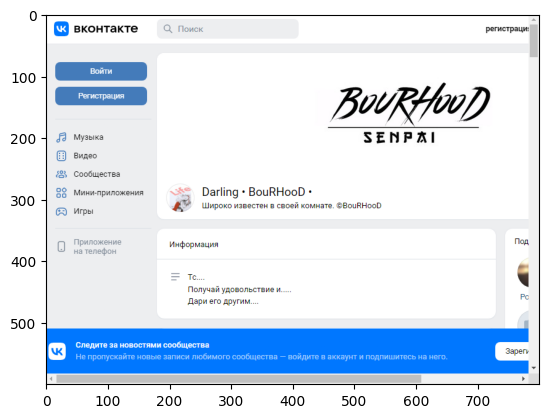

In [63]:
screenshot_dublicate = df[df.screenshot.duplicated(keep=False)].screenshot
not_null_list = []
for screen in screenshot_dublicate:
    if screen is None or screen == 0:
        continue
    not_null_list.append(screen)

import random
screenshoot = not_null_list[random.randint(0, len(not_null_list) - 1)]

import matplotlib.image as mpimg
import io
fp = io.BytesIO(screenshoot)
with fp:
    img = mpimg.imread(fp, format='jpeg')

plt.imshow(img)
plt.show()

In [48]:
db.close()